In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing necesssary libraries

In [2]:
data=pd.read_csv("drugeffects.csv",index_col=0)
#importing data

In [3]:
data.head(10)
# Displaying the datahead

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
5,propecia,1,Ineffective,hair loss,Severe Side Effects
6,vyvanse,9,Highly Effective,add,Mild Side Effects
7,elavil,10,Considerably Effective,depression,No Side Effects
8,xanax,10,Highly Effective,panic disorder,No Side Effects
9,claritin,1,Ineffective,allergies,Extremely Severe Side Effects


In [4]:
# Shape(Number of rows and columns)
data.shape

(3107, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   urlDrugName    3107 non-null   object
 1   rating         3107 non-null   int64 
 2   effectiveness  3107 non-null   object
 3   condition      3106 non-null   object
 4   sideEffects    3107 non-null   object
dtypes: int64(1), object(4)
memory usage: 145.6+ KB


In [6]:
#checking for missing values
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [7]:
#filling null value with mode
data['condition'] = data['condition'].fillna(data['condition'].mode()[0])

In [8]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

no more null values

In [9]:
data['urlDrugName'].value_counts()
#finding different drugs present in the data

lexapro              63
prozac               46
retin-a              45
zoloft               45
propecia             38
                     ..
aralen                1
cardura               1
polymyxin-b           1
kenalog               1
trimethobenzamide     1
Name: urlDrugName, Length: 502, dtype: int64

In [10]:
data['condition'].value_counts().head(10)
#finding the different conditions for use of drug

depression             237
acne                   165
anxiety                 63
insomnia                54
birth control           49
high blood pressure     42
allergies               37
asthma                  33
acid reflux             33
migraines               31
Name: condition, dtype: int64

In [11]:
data['sideEffects'].value_counts()
#finding range of sideeffects possible 

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

# Data visulaization

In [12]:
value=data['sideEffects'].value_counts()
# sizes=value[:10]
series=pd.DataFrame(value)
#series['sideEffects']=series.index
series.rename(columns={'sideEffects': 'Frequency'},inplace=True)
series

,Frequency
Mild Side Effects,1019
No Side Effects,930
Moderate Side Effects,614
Severe Side Effects,369
Extremely Severe Side Effects,175


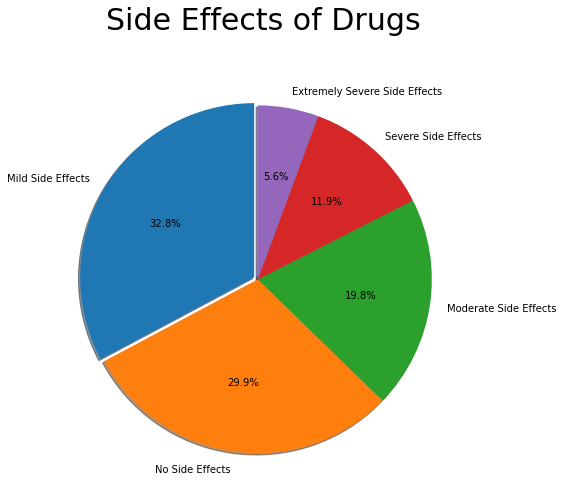

In [13]:
explode = (0.05,0,0,0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(series['Frequency'], labels=series.index,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=2)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.suptitle('Side Effects of Drugs', x=0.525, y=1.45, ha='center', fontsize=30)
# plt.title( "Side Effects of Drugs" , size = 3 ) 
plt.show()

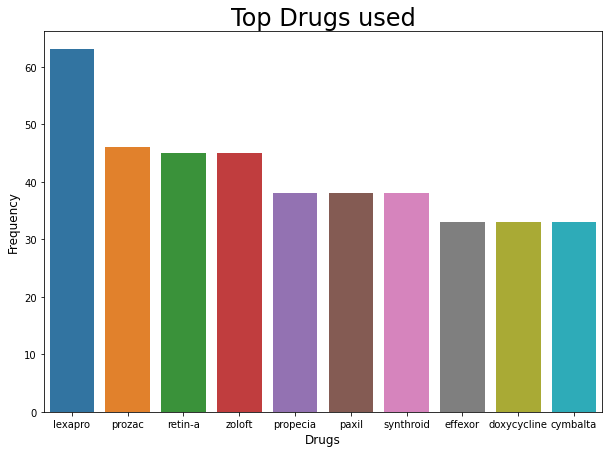

In [14]:
val=data['urlDrugName'].value_counts().head(10)
# sizes=value[:10]
series=pd.DataFrame(val)
#series['sideEffects']=series.index
series.rename(columns={'urlDrugName': 'Frequency'},inplace=True)
fig, ax = plt.subplots(figsize=(10,7))
# Set label for x-axis 
ax.set_xlabel( "Drugs" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Frequency" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Top Drugs used" , size = 24 ) 
sns.barplot(x=series.index,y=series['Frequency'],data=series)

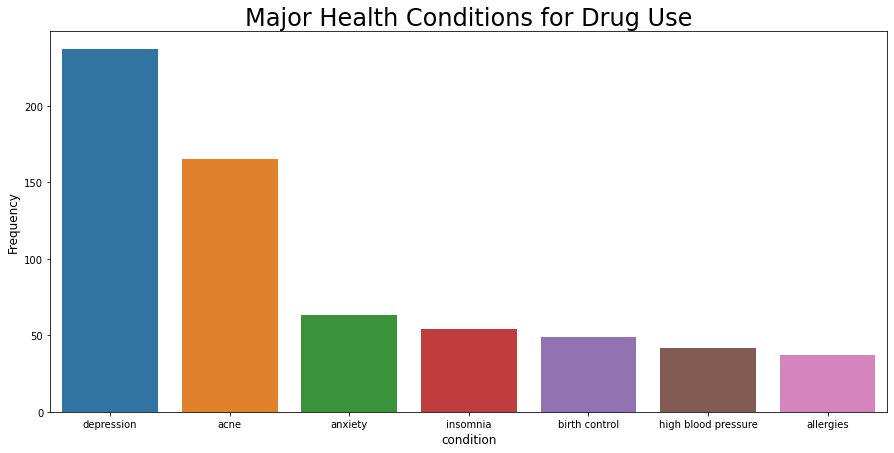

In [15]:
val=data['condition'].value_counts().head(7)
# sizes=value[:10]
series=pd.DataFrame(val)
#series['sideEffects']=series.index
series.rename(columns={'condition': 'Frequency'},inplace=True)
fig, ax = plt.subplots(figsize=(15,7))
# Set label for x-axis 
ax.set_xlabel( "condition" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "Frequency" , size = 12 ) 
  
# Set title for plot 
ax.set_title( "Major Health Conditions for Drug Use" , size = 24 ) 
sns.barplot(x=series.index,y=series['Frequency'],data=series)

Text(0, 0.5, 'Frequency')

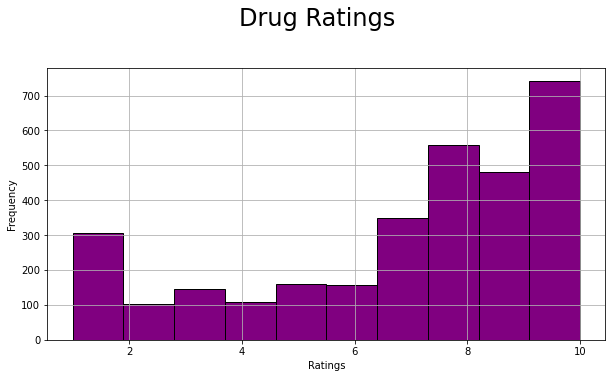

In [16]:
plt.figure(figsize=(10,5))
data['rating'].hist(bins=10,ec='k',color='purple', edgecolor='black')
# plt.title('Drug Rating',size=10)
plt.suptitle('Drug Ratings', x=0.5, y=1.05, ha='center', fontsize=24)
plt.xlabel("Ratings")
plt.ylabel("Frequency")

In [17]:
#Encoding of categorical variables
#Label encoding is used
cols=['urlDrugName','effectiveness','condition','sideEffects']
from sklearn.preprocessing import LabelEncoder
mappings=list()
labelencoder=LabelEncoder()
for x in cols:
    data[x]=labelencoder.fit_transform(data[x])
    mappings_dict={index:label for index, label in enumerate(labelencoder.classes_)}
    mappings.append(mappings_dict)

In [18]:
mappings

[{0: 'abilify',
  1: 'accolate',
  2: 'accupril',
  3: 'accutane',
  4: 'aciphex',
  5: 'actiq',
  6: 'actonel',
  7: 'actos',
  8: 'acyclovir',
  9: 'aczone',
  10: 'adcirca',
  11: 'adderall',
  12: 'adderall-xr',
  13: 'adipex-p',
  14: 'advair-diskus',
  15: 'advair-hfa',
  16: 'albuterol',
  17: 'aldactone',
  18: 'aldara',
  19: 'alendronate',
  20: 'alesse',
  21: 'allegra',
  22: 'allegra-d',
  23: 'aloprim',
  24: 'alprazolam',
  25: 'ambien',
  26: 'ambien-cr',
  27: 'amerge',
  28: 'amitiza',
  29: 'amoxil',
  30: 'amphetamine',
  31: 'ampicillin',
  32: 'anafranil',
  33: 'androgel',
  34: 'angeliq',
  35: 'antivert',
  36: 'aralen',
  37: 'arava',
  38: 'aricept',
  39: 'arimidex',
  40: 'armour-thyroid',
  41: 'aromasin',
  42: 'arthrotec',
  43: 'asacol',
  44: 'asmanex',
  45: 'atacand',
  46: 'atarax',
  47: 'atenolol',
  48: 'ativan',
  49: 'atripla',
  50: 'augmentin',
  51: 'avage',
  52: 'avapro',
  53: 'avelox',
  54: 'avita',
  55: 'avodart',
  56: 'axert',
  57:

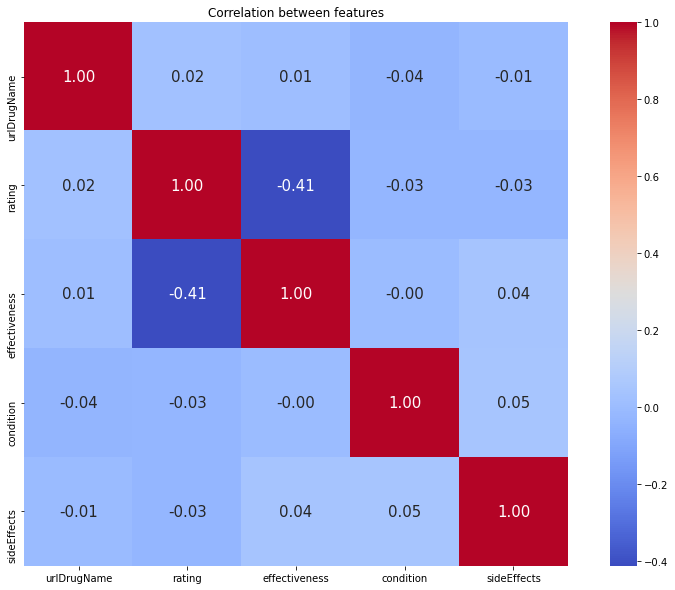

In [19]:
# Correlation
data_corr = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(data_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [20]:
x=data.drop('sideEffects',axis=1)
y=data['sideEffects']
#splitting the data into input variables and target variable

In [21]:
 #scaling the input variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
datas=scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)
#splitting the dataset into testing set and training set

# Logistic regression model

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\AHALYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.38      0.58      0.46       199
           2       0.39      0.17      0.23       109
           3       0.44      0.39      0.41       206
           4       0.40      0.46      0.43        78

    accuracy                           0.40       622
   macro avg       0.32      0.32      0.31       622
weighted avg       0.39      0.40      0.38       622



C:\Users\AHALYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gaussian Naive Bayes model

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.33      0.57      0.42        30
           1       0.45      0.58      0.51       199
           2       0.32      0.28      0.30       109
           3       0.59      0.46      0.51       206
           4       0.45      0.32      0.38        78

    accuracy                           0.45       622
   macro avg       0.43      0.44      0.42       622
weighted avg       0.47      0.45      0.45       622



# Bernoulli Naive Bayes model

In [26]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.35      0.34      0.34       199
           2       0.00      0.00      0.00       109
           3       0.34      0.71      0.46       206
           4       0.00      0.00      0.00        78

    accuracy                           0.34       622
   macro avg       0.14      0.21      0.16       622
weighted avg       0.22      0.34      0.26       622



C:\Users\AHALYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(2,15)
for k in neighbors:
    model=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

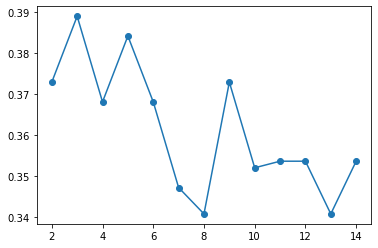

In [28]:
plt.plot(neighbors,acc_values,"o-")

In [29]:
model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.18      0.33      0.23        30
           1       0.39      0.54      0.45       199
           2       0.29      0.24      0.26       109
           3       0.52      0.44      0.48       206
           4       0.31      0.12      0.17        78

    accuracy                           0.39       622
   macro avg       0.34      0.33      0.32       622
weighted avg       0.40      0.39      0.38       622



# Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.42      0.50      0.45        30
           1       0.44      0.48      0.46       199
           2       0.36      0.37      0.36       109
           3       0.56      0.52      0.54       206
           4       0.42      0.36      0.39        78

    accuracy                           0.46       622
   macro avg       0.44      0.45      0.44       622
weighted avg       0.46      0.46      0.46       622



In [31]:
clf=DecisionTreeClassifier(random_state=123)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Classification report: \n",classification_report(y_test,y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.43      0.53      0.48        30
           1       0.44      0.49      0.46       199
           2       0.35      0.36      0.35       109
           3       0.57      0.51      0.54       206
           4       0.38      0.32      0.35        78

    accuracy                           0.45       622
   macro avg       0.43      0.44      0.44       622
weighted avg       0.46      0.45      0.46       622



In [32]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=123,min_samples_split=30,max_depth=300)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Classification matrix: \n",classification_report(y_test,y_pred))

Classification matrix: 
               precision    recall  f1-score   support

           0       0.42      0.73      0.53        30
           1       0.43      0.53      0.47       199
           2       0.36      0.38      0.37       109
           3       0.58      0.47      0.52       206
           4       0.54      0.28      0.37        78

    accuracy                           0.46       622
   macro avg       0.46      0.48      0.45       622
weighted avg       0.48      0.46      0.46       622



# Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
               precision    recall  f1-score   support

           0       0.42      0.53      0.47        30
           1       0.46      0.52      0.49       199
           2       0.35      0.36      0.35       109
           3       0.60      0.55      0.58       206
           4       0.36      0.27      0.31        78

    accuracy                           0.47       622
   macro avg       0.44      0.45      0.44       622
weighted avg       0.47      0.47      0.47       622



# Linear SVM Model

In [35]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.44      0.62      0.51       199
           2       0.36      0.20      0.26       109
           3       0.59      0.50      0.54       206
           4       0.43      0.59      0.50        78

    accuracy                           0.47       622
   macro avg       0.36      0.38      0.36       622
weighted avg       0.45      0.47      0.45       622



C:\Users\AHALYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Polynomial SVM Model

In [38]:
svm_po=SVC(kernel='poly',degree=3)
svm_po.fit(x_train,y_train)
y_pred=svm_po.predict(x_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.33      0.93      0.49       199
           2       0.00      0.00      0.00       109
           3       0.32      0.10      0.15       206
           4       0.00      0.00      0.00        78

    accuracy                           0.33       622
   macro avg       0.13      0.21      0.13       622
weighted avg       0.21      0.33      0.21       622



C:\Users\AHALYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Radial SVM Model

In [39]:
svm_ra=SVC(kernel='rbf')
svm_ra.fit(x_train,y_train)
y_pred=svm_ra.predict(x_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.33      0.75      0.46       199
           2       0.00      0.00      0.00       109
           3       0.34      0.27      0.30       206
           4       0.00      0.00      0.00        78

    accuracy                           0.33       622
   macro avg       0.13      0.21      0.15       622
weighted avg       0.22      0.33      0.25       622



C:\Users\AHALYA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Model

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(random_state=123,n_estimators =58,min_samples_split=0.07)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.44      0.70      0.54        30
           1       0.51      0.65      0.58       199
           2       0.37      0.34      0.36       109
           3       0.71      0.58      0.64       206
           4       0.45      0.32      0.38        78

    accuracy                           0.53       622
   macro avg       0.50      0.52      0.50       622
weighted avg       0.54      0.53      0.53       622



In [41]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(random_state=123)
xgbc.fit(x_train,y_train)
y_pred=xgbc.predict(x_test)
print("Classification report : \n",classification_report(y_test,y_pred))

C:\Users\AHALYA\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report : 
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        30
           1       0.51      0.56      0.54       199
           2       0.37      0.39      0.38       109
           3       0.63      0.57      0.60       206
           4       0.44      0.36      0.39        78

    accuracy                           0.51       622
   macro avg       0.48      0.50      0.49       622
weighted avg       0.52      0.51      0.51       622

